<a href="https://colab.research.google.com/github/KuvinaDesch/MAT421/blob/main/ModB2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instead of using a piecewise function that changes at each point, we can find a single polynomial that goes through every point.  This is a Lagrange polynomial.  It is defined as the sum of several basis polynomials.  Each basis polynomial is computed ss follows:

Pi(x) = product j = 1 to n, excluding i of (x-xj)/(xi-xj)

And the final polynomial is a linear combination of those, defined by:

L(x) = sum i = 1 to n of (yi(Pi(x)))

The point of this is that any basis polynomial Pi(x) will output 0 for all values of x in the dataset except for xi, in which case it outputs 1.  If you then multiply by yi, it will output the correct value at that point and 0 for all other points in the dataset.  Then adding them all together means the sum will pass through all points.

We will do an example with the points (1, 1), (2, 3), (4, 2).

P1(x) = (x-2)(x-4)/((1-2)(1-4)) = (1/3)(x^2 - 6x + 8)  
P2(x) = (x-1)(x-4)/((2-1)(2-4)) = (-1/2)(x^2 - 5x + 4)  
P3(x) = (x-1)(x-2)/((4-1)(4-2)) = (1/6)(x^2 - 3x + 2)

Now that we have the polynomaials, we will implement them in python

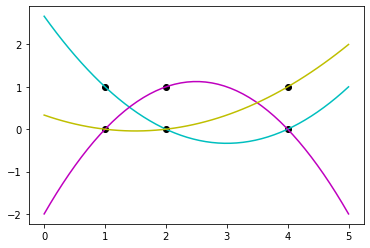

In [21]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

plt.plot(1,0, 'ko')
plt.plot(1,1, 'ko')
plt.plot(2,0, 'ko')
plt.plot(2,1, 'ko')
plt.plot(4,0, 'ko')
plt.plot(4,1, 'ko')

P1 = poly.Polynomial([8/3, -2, 1/3])
P2 = poly.Polynomial([-2, 5/2, -1/2])
P3 = poly.Polynomial([1/3, -1/2, 1/6])

x = np.linspace(0, 5, 50)

plt.plot(x, P1(x), 'c')
plt.plot(x, P2(x), 'm')
plt.plot(x, P3(x), 'y')

#making polynomials with those coefficients, we can see how
#each one passes through zero for the values in the dataset
#except for 1, and which one this is differs between the 3

#P = P1 + 3*P2 + 2*P3
#plt.plot(x, P(x), 'r')

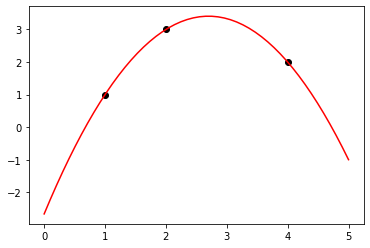

In [23]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

plt.plot(1,1, 'ko')
plt.plot(2,3, 'ko')
plt.plot(4,2, 'ko')

P1 = poly.Polynomial([8/3, -2, 1/3])
P2 = poly.Polynomial([-2, 5/2, -1/2])
P3 = poly.Polynomial([1/3, -1/2, 1/6])

x = np.linspace(0, 5, 50)

P = P1 + 3*P2 + 2*P3

plt.plot(x, P(x), 'r')


#when we multiply by the corresponding y values and add the
#polynomials together, we get a function that passes through every point.


It has made a Lagrange polynomial to interpolate the data.  But it decreases very quickly on the left and right sides.  This is an example of why you should only use Lagrange polynomials to interpolate within the domain.  Anyway, doing this by hand is unnecessary because scipy can do it for us.

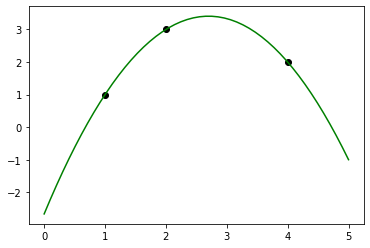

In [28]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange


x = [1, 2, 4]
y = [1, 3, 2]

f = lagrange(x, y)

ls = np.linspace(0, 5, 50)


plt.plot(1,1, 'ko')
plt.plot(2,3, 'ko')
plt.plot(4,2, 'ko')

plt.plot(ls, f(ls), 'g')

#We can see this is the same result as before when we did it manually

Another interpolation method is Newton's polynomial method.  It makes an n-1 order polynomial of the form  
f(x) = a0 + a1(x-x0) + a2(x-x0)(x-x1) + ... + an(x-x0)...(x-xn)  

The unique thing is that the coefficients are determined with a procedural method.

Each coefficient is ak = f[xk,...x0]
The final one is f[xn,...x0]

It can be defined iteratively by:  
f[xj,...xk] = (f[xj,...x_(k+1)] - f[x_(j-1),...xk])/(xj-xk)


We can arrange these into the top left half of a matrix and then use a function to calculate the coefficients.  We will use for example (1, 1), (2, 5), (3, 3), (4, 4), (5, 2).

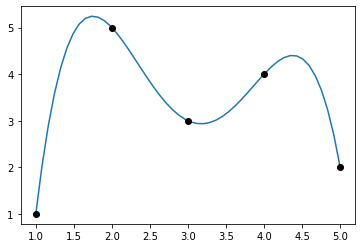

In [56]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [1, 5, 3, 4, 2]

n = 5

A = np.zeros([n, n])

A[:, 0] = y

for i in range(1,n):
  for j in range(0, n-i):
    A[j][i] = (A[j+1][i-1] - A[j][i-1])/(x[i+j] - x[j])

co = A[0, :]

#copied from text
def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial 
    at x
    '''
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p


ls = np.linspace(1, 5, 50)
ls2 = newton_poly(co, x, ls)

plt.plot(ls, ls2)

plt.plot(1,1,'ko')
plt.plot(2,5,'ko')
plt.plot(3,3,'ko')
plt.plot(4,4,'ko')
plt.plot(5,2,'ko')

# we can see it passes through each point